## INTRODUCTION

### In this project, we wrangle and analyse the data gotten from the twitter archive of WeRateDogs twitter archive.
### WeRateDogs is a twitter account where different types of dogs are rated and accessed. In this project,i will gather, assess(visually and programmatically) ,clean and analyse the data. This data was obtained with the twitter API.

## Imports


In [1]:
! pip install tweepy

In [120]:
import pandas as pd
import numpy as np
import requests
import json
import os
from bs4 import BeautifulSoup
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

import matplotlib.pyplot as plt

%matplotlib inline





## Data gathering

#### Gathering the twitter data file manually, by reading the csv file from its location.

In [4]:
#using the read_csv function to read the file
twitter_data = pd.read_csv('twitter-archive-enhanced.csv')
twitter_data.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Gathering the data image predictions data programmatically, by using code snippets to download the file hosted on a server

In [5]:
#folder_name = "image_prediction"
#os.makedirs(folder_name)
#file = 'C:\Users\User\Documents\Omimi\Untitled Folder\image_prediction'


In [24]:
# using the requests library to get the data from the website with the url
URL = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(URL)
data = response.content




In [25]:
# reading the text in the files line by line and writing it in an already created file
with open ("image_pred.csv",'wb') as file:
    file.write(data)

In [6]:
#loading the already downloaded data with the pandas library
image_prediction = pd.read_csv('image_pred.csv',sep = '\t')
image_prediction.head(15)




,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Using the twitters API to get additonal infomation from the twitter archive of WeRateDogs

In [7]:

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_data.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193


TypeError: catching classes that do not inherit from BaseException is not allowed

In [9]:
#opening the json file,reading the lines one by one and converting to a dataframe
tweet_data = []
with open ('tweet-json.txt','r') as tweet_json:
    for tweets in tweet_json:
        data = json.loads(tweets)
        tweet_id = data['id']
        retweets_count = data['retweet_count']
        favv_count = data['favorite_count']
        followers_count = data['user']['followers_count'] # this data is contained in a nested dictionary
        # Appending the values in the tweet_data list in a dictionary
        tweet_data.append({'tweet_id':tweet_id,
                           'retweet_count': retweets_count,
                           'favorite_count': favv_count,
                           'followers_count': followers_count
            
        })
        
#converting to a dataframe
columnss = tweet_data[0].keys()
tweet_df = pd.DataFrame(tweet_data,columns = columnss)


In [10]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


## Accessing the data

### Visual assesment and Programmatic

In [11]:
# For archive
# split and use indexing or even regex
# use melt to put all the dataframes into one column

In [60]:
# Making copies of the dataframe
twitter_df = twitter_data.copy()
image_prediction_df = image_prediction.copy()
tweets_df = tweet_df.copy() 




In [61]:
twitter_df.shape

(2356, 17)

In [62]:
twitter_df


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [63]:
image_prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## Programmatically 

In [64]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [65]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [66]:
twitter_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
264,842163532590374912,NaN,NaN,2017-03-16 00:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet George. He looks slightly deflated but ov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842163532...,12,10,George,None,None,None,None
1639,684177701129875456,NaN,NaN,2016-01-05 01:00:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kulet. She's very proud of the flower ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684177701...,10,10,Kulet,None,None,None,None
1290,708130923141795840,NaN,NaN,2016-03-11 03:22:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in non canines like this G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708130923...,11,10,None,None,None,None,None
1083,738537504001953792,NaN,NaN,2016-06-03 01:07:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bayley. She fell asleep trying to esca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738537504...,11,10,Bayley,None,None,None,puppo
480,815736392542261248,NaN,NaN,2017-01-02 01:48:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Akumi. It's his birthday. He received ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815736392...,11,10,Akumi,None,None,None,None
2115,670428280563085312,NaN,NaN,2015-11-28 02:25:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Willy. He's millennial af. 11/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670428280...,11,10,Willy,None,None,None,None
1797,677269281705472000,NaN,NaN,2015-12-16 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest pupper I've ever seen. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677269281...,10,10,the,None,None,pupper,None
993,748575535303884801,NaN,NaN,2016-06-30 17:54:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is one of the most reckless puppers I've ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748575535...,6,10,one,None,None,None,None
816,770787852854652928,NaN,NaN,2016-08-31 00:58:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His tongue has gone rogue. Do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770787852...,10,10,Winston,None,None,None,None
330,833124694597443584,NaN,NaN,2017-02-19 01:23:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gidget. She's a spy pupper. Stealthy a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833124694...,12,10,Gidget,None,None,pupper,None


In [67]:
image_prediction_df.describe()


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [68]:
twitter_df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [69]:
image_prediction_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1632,805826884734976000,https://pbs.twimg.com/ext_tw_video_thumb/80582...,1,Siberian_husky,0.248926,True,American_Staffordshire_terrier,0.098313,True,Eskimo_dog,0.080188,True
111,667902449697558528,https://pbs.twimg.com/media/CUTdvAJXIAAMS4q.jpg,1,Norwegian_elkhound,0.298881,True,malamute,0.279479,True,Eskimo_dog,0.198428,True
141,668567822092664832,https://pbs.twimg.com/media/CUc64knWoAkZt70.jpg,1,Shih-Tzu,0.985649,True,Lhasa,0.007078,True,Pekinese,0.003053,True
1732,821149554670182400,https://pbs.twimg.com/ext_tw_video_thumb/82114...,1,German_shepherd,0.515933,True,malinois,0.203651,True,Irish_setter,0.091055,True
70,667192066997374976,https://pbs.twimg.com/media/CUJXpRBXIAAN0yz.jpg,1,Rottweiler,0.283640,True,miniature_pinscher,0.148112,True,black-and-tan_coonhound,0.095585,True
1862,842765311967449089,https://pbs.twimg.com/media/C7IalMVX0AATKRD.jpg,1,tub,0.665238,False,bucket,0.105166,False,Labrador_retriever,0.029340,True
2047,886736880519319552,https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg,1,kuvasz,0.309706,True,Great_Pyrenees,0.186136,True,Dandie_Dinmont,0.086346,True
1936,860184849394610176,https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg,1,chimpanzee,0.267612,False,gorilla,0.104293,False,orangutan,0.059908,False
1153,732726085725589504,https://pbs.twimg.com/media/CisqdVcXEAE3iW7.jpg,1,Pomeranian,0.961902,True,Samoyed,0.024289,True,chow,0.005772,True
2019,880465832366813184,https://pbs.twimg.com/media/DDgK-J4XUAIEV9W.jpg,1,golden_retriever,0.913255,True,Labrador_retriever,0.026329,True,cocker_spaniel,0.009371,True


In [70]:
image_prediction_df.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [71]:
image_prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [72]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favorite_count   2354 non-null   int64
 3   followers_count  2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [73]:
tweets_df.describe()

,tweet_id,retweet_count,favorite_count,followers_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01
min,6.660209e+17,0.000000,0.000000,3.200799e+06
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06


In [74]:
tweets_df.tail()

,tweet_id,retweet_count,favorite_count,followers_count
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018
2353,666020888022790149,532,2535,3201018


In [75]:
twitter_df.source


0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2356, dtype: object

In [76]:
twitter_df.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [77]:
tweets_df


,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
...,...,...,...,...
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018


# Quality Issues
**`Treatment table`**
- 

- Sources were in href form
- Timestamp datatype should be datetime object
- The additional string in the date time format('+0000')
- Duplicates in the text column - as a result of retweets
- Irrelevant columns
- Rating denominators that are above and below 10
- Rows that do not contain information related to dog rating
- Inaccurate names in the names column
- Missing urls in expanded url column
- Outliers in the rating numerator column



# Tidiness Issues
**`Treatment table`**
- 

- Dog stages columns - doggo,floofer,pupper,puppo
- All three tables should be in one table - the same unit type







## Cleaning Data

## #Issue 1


### Define
#### Extract the phones names that each tweet was made with from the source link

In [78]:
#Using the split method to split the strings in the source column and using pythons slicicng and indexing method to get the required device name
twitter_df.source = twitter_df.source.str.split('>')[1][1][:-3]

### Test

In [79]:
#Checking the source column in the dataframe after applying the above code
twitter_df.source
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


## Issue 2 : Timestamp datatype should be datetime and not object

### Define
#### convert the timestamp column to datetime objects

In [80]:
# Using the pandas to_datetime() method to convert the timestamp column to a datetime object
twitter_df.timestamp = pd.to_datetime(twitter_df.timestamp)

### Test

In [81]:
#Checking the info of the dataframe 
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

## Issue 3: The additional string in the date time format('+0000')

### Define
#### Removing the additional string by changing the datetime format

In [82]:
# Using the strf datetime function to change the format of the datetime object
twitter_df.timestamp = twitter_df.timestamp.dt.strftime('%Y-%m-%d T %H:%M:%S')

### Test

In [83]:
#Checking the data type
twitter_df.timestamp

0       2017-08-01 T 16:23:56
1       2017-08-01 T 00:17:27
2       2017-07-31 T 00:18:03
3       2017-07-30 T 15:58:51
4       2017-07-29 T 16:00:24
                ...          
2351    2015-11-16 T 00:24:50
2352    2015-11-16 T 00:04:52
2353    2015-11-15 T 23:21:54
2354    2015-11-15 T 23:05:30
2355    2015-11-15 T 22:32:08
Name: timestamp, Length: 2356, dtype: object

## #Issue 4 : Duplicates in the text column - as a result of retweets



### Define
#### Drop the the rows that have retweet information because these rows contain duplicated text

In [84]:
# Dropping the rows that have retweeted status Id in order to drop the duplicated texts,i wont just drop the columns because the text values will still be there after i drop the columns,thereby defeating my aim
twitter_df= twitter_df[twitter_df['retweeted_status_id'].isna()]

### Test

In [85]:
# Checking if notna were all droppped
twitter_df['retweeted_status_id'].notna().value_counts()

False    2175
Name: retweeted_status_id, dtype: int64

## #Issue 5 : Irrelevant columns


### Define 
#### Dropping all columns that contain retweet information because they are irrelavant to this analysis.

In [86]:
# Using the pandas drop function 
twitter_df = twitter_df.drop(['retweeted_status_id',                    
   'retweeted_status_user_id',               
   'retweeted_status_timestamp','expanded_urls'],axis = 1)

### Test


In [87]:
twitter_df.head(
)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 T 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 T 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 T 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 T 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 T 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


## #Issue 6 : Rating denominators that are above and below 10

### Define
#### Replacing the values in the rating_denominator column that are above or below 10 with 10

In [88]:
# Removing values that are less than or greater than 10
wrong_dens = list(twitter_df.rating_denominator.unique())
twitter_df['rating_denominator'].replace(wrong_dens,10,inplace=True)


### Test

In [89]:
# Checking the unique values in the column
twitter_df.rating_denominator.unique()

array([10], dtype=int64)

## #Issue 7 : Rows that do not contain information related to dog rating

### Define
#### Drop rows that have text content that do not contain dog rating information

In [90]:
# Using the islower() function and str.contain to drop rows that do not contain dog information
twitter_df = twitter_df[~(twitter_df['text'].str.lower().str.contains('dogs') | twitter_df['text'].str.lower().str.contains('we rate dogs'))]

### Test



In [91]:
#Checking rows that contain dog information
twitter_df[twitter_df['text'].str.lower().str.contains('dogs') | twitter_df['text'].str.lower().str.contains('we rate dogs')]
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 T 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 T 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 T 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 T 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 T 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,666050758794694657,NaN,NaN,2015-11-16 T 00:30:50,Twitter for iPhone,This is a truly beautiful English Wilson Staff...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 T 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 T 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 T 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,a,None,None,None,None


## #Issue 8 : Inaccurate names in the names column

### Define
#### Drop rows with wrong names in the names column, names such as a,that,etc. The wrong names are all in lower case.
#### During the visual assessment, i observed that all the names that were in lower case and upper case were inaccurate.

In [92]:
# Using the islower() function to create a conditon ,for filtering rows with wrong dog names
wrong_names = twitter_df[twitter_df['name'].str.islower()|twitter_df['name'].str.isupper()]['name'].to_list()
len(wrong_names)
wrong_names

['such',
 'a',
 'not',
 'one',
 'a',
 'O',
 'one',
 'not',
 'his',
 'one',
 'a',
 'a',
 'actually',
 'a',
 'just',
 'mad',
 'this',
 'all',
 'old',
 'a',
 'a',
 'a',
 'a',
 'a',
 'just',
 'a',
 'the',
 'by',
 'officially',
 'a',
 'the',
 'the',
 'a',
 'a',
 'life',
 'a',
 'one',
 'a',
 'a',
 'a',
 'light',
 'just',
 'space',
 'a',
 'the',
 'JD',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'an',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'quite',
 'an',
 'a',
 'an',
 'the',
 'the',
 'a',
 'a',
 'an',
 'a',
 'a',
 'a']

In [93]:
#using the list of wrong_names,drop rows that contain strings in the wrong_names
twitter_df = twitter_df[twitter_df.name.isin(wrong_names) == False]


### Test

In [94]:
#Checking if all rows that contain strings from the wrong list where dropped
twitter_df.name.value_counts()
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 T 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 T 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 T 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 T 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 T 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 T 02:38:37,Twitter for iPhone,Here we have a well-established sunblockerspan...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 T 01:59:36,Twitter for iPhone,Let's hope this flight isn't Malaysian (lol). ...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 T 01:52:02,Twitter for iPhone,Here we have a northern speckled Rhododendron....,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 T 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None


#### From the above code test, it can be observed that all rows that contained strings from the wrong list were dropped. 

In [95]:
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 T 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 T 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 T 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 T 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 T 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 T 02:38:37,Twitter for iPhone,Here we have a well-established sunblockerspan...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 T 01:59:36,Twitter for iPhone,Let's hope this flight isn't Malaysian (lol). ...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 T 01:52:02,Twitter for iPhone,Here we have a northern speckled Rhododendron....,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 T 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None


## Tidiness Issues



## #Issue 9 : Dog stages should all be in one column

In [96]:
twitter_df = pd.melt(twitter_df, id_vars=['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp',
       'source','text','rating_numerator',
        'rating_denominator','name'],value_name = 'Dog_stages',value_vars=['doggo', 'floofer', 'pupper', 'puppo'])

In [97]:
twitter_df


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,variable,Dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 T 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,doggo,None
1,892177421306343426,NaN,NaN,2017-08-01 T 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,doggo,None
2,891815181378084864,NaN,NaN,2017-07-31 T 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,doggo,None
3,891689557279858688,NaN,NaN,2017-07-30 T 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,doggo,None
4,891327558926688256,NaN,NaN,2017-07-29 T 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,doggo,None
...,...,...,...,...,...,...,...,...,...,...,...
7831,666082916733198337,NaN,NaN,2015-11-16 T 02:38:37,Twitter for iPhone,Here we have a well-established sunblockerspan...,6,10,None,puppo,None
7832,666073100786774016,NaN,NaN,2015-11-16 T 01:59:36,Twitter for iPhone,Let's hope this flight isn't Malaysian (lol). ...,10,10,None,puppo,None
7833,666071193221509120,NaN,NaN,2015-11-16 T 01:52:02,Twitter for iPhone,Here we have a northern speckled Rhododendron....,9,10,None,puppo,None
7834,666049248165822465,NaN,NaN,2015-11-16 T 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,puppo,None


In [98]:
#droppind the variable column that was created during the melting 
twitter_df = twitter_df.drop('variable',axis=1)
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,Dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 T 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 T 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 T 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 T 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 T 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None
...,...,...,...,...,...,...,...,...,...,...
7831,666082916733198337,NaN,NaN,2015-11-16 T 02:38:37,Twitter for iPhone,Here we have a well-established sunblockerspan...,6,10,None,None
7832,666073100786774016,NaN,NaN,2015-11-16 T 01:59:36,Twitter for iPhone,Let's hope this flight isn't Malaysian (lol). ...,10,10,None,None
7833,666071193221509120,NaN,NaN,2015-11-16 T 01:52:02,Twitter for iPhone,Here we have a northern speckled Rhododendron....,9,10,None,None
7834,666049248165822465,NaN,NaN,2015-11-16 T 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None


In [99]:
twitter_df.Dog_stages.value_counts()

None       7499
pupper      220
doggo        83
puppo        25
floofer       9
Name: Dog_stages, dtype: int64

In [100]:
twitter_df


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,Dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 T 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 T 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 T 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 T 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 T 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None
...,...,...,...,...,...,...,...,...,...,...
7831,666082916733198337,NaN,NaN,2015-11-16 T 02:38:37,Twitter for iPhone,Here we have a well-established sunblockerspan...,6,10,None,None
7832,666073100786774016,NaN,NaN,2015-11-16 T 01:59:36,Twitter for iPhone,Let's hope this flight isn't Malaysian (lol). ...,10,10,None,None
7833,666071193221509120,NaN,NaN,2015-11-16 T 01:52:02,Twitter for iPhone,Here we have a northern speckled Rhododendron....,9,10,None,None
7834,666049248165822465,NaN,NaN,2015-11-16 T 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None


## #Issue 10 : All three tables should be one

### Define
#### All three tables should be one dataframe because they all consist of units of data relating to a particular subject, that is all these observational units are of same type. After gathering and cleaning this data tables, because they are of the same unit type, will be merged together to form one table


In [101]:
# Merge the three cleaned datasets in a master table using the pandas merge function  
twitter_data_master = twitter_df.merge(image_prediction_df,on='tweet_id').merge(tweets_df,on='tweet_id')

## Test


In [102]:
#Checking if all observational units are now in one table
twitter_data_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,Dog_stages,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count
0,892420643555336193,NaN,NaN,2017-08-01 T 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,3200889
1,892420643555336193,NaN,NaN,2017-08-01 T 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,3200889
2,892420643555336193,NaN,NaN,2017-08-01 T 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,3200889
3,892420643555336193,NaN,NaN,2017-08-01 T 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,3200889
4,892177421306343426,NaN,NaN,2017-08-01 T 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,3200889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7163,666049248165822465,NaN,NaN,2015-11-16 T 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111,3201018
7164,666020888022790149,NaN,NaN,2015-11-15 T 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,None,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,532,2535,3201018
7165,666020888022790149,NaN,NaN,2015-11-15 T 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,None,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,532,2535,3201018
7166,666020888022790149,NaN,NaN,2015-11-15 T 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,None,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,532,2535,3201018


# Storing the data


### After all the cleaned data tables have been merged, i'll store it in a csv file.

In [55]:
twitter_data_master.to_csv(r'C:\Users\User\Documents\Omimi\Untitled Folder\twitter_archive_master.csv')

In [130]:
twitter_df.to_csv(r'C:\Users\User\Documents\Omimi\Untitled Folder\twitter data .csv')

In [131]:
image_prediction_df.to_csv(r'C:\Users\User\Documents\Omimi\Untitled Folder\image prediction data.csv')

In [132]:
tweets_df.to_csv(r'C:\Users\User\Documents\Omimi\Untitled Folder\tweet data.csv')

## Analyzing and visualizing the wrangled data

In [ ]:
#Analysing twitter wrangled data which is the twitter_df

In [105]:
twitter_archive = twitter_df.copy()
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,rating_numerator,rating_denominator,name,Dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 T 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 T 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 T 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 T 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 T 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None
...,...,...,...,...,...,...,...,...,...,...
7831,666082916733198337,NaN,NaN,2015-11-16 T 02:38:37,Twitter for iPhone,Here we have a well-established sunblockerspan...,6,10,None,None
7832,666073100786774016,NaN,NaN,2015-11-16 T 01:59:36,Twitter for iPhone,Let's hope this flight isn't Malaysian (lol). ...,10,10,None,None
7833,666071193221509120,NaN,NaN,2015-11-16 T 01:52:02,Twitter for iPhone,Here we have a northern speckled Rhododendron....,9,10,None,None
7834,666049248165822465,NaN,NaN,2015-11-16 T 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None


### Creating a separate column for years the ratings were given from the wrangled twitter archive dataframe,which is saved as twitter_archive

In [106]:
# Creating a column for the year and extracting the year from the timestamp,using a copy of the wrangled twitter data
twitter_archive['Year'] = twitter_archive['timestamp'].str[:4]
twitter_archive.Year

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
7831    2015
7832    2015
7833    2015
7834    2015
7835    2015
Name: Year, Length: 7836, dtype: object

In [108]:
#Using the groupby method to ascertain the ratings of each year
twitter_archive.groupby('Year')['rating_numerator'].sum()

Year
2015    24684
2016    53772
2017    26884
Name: rating_numerator, dtype: int64

### It can be clearly seen that there were more ratings in the year 2016

### Analysing the Dog stages and the rating numerator

In [111]:
twitter_archive.Dog_stages.value_counts()

None       7499
pupper      220
doggo        83
puppo        25
floofer       9
Name: Dog_stages, dtype: int64

In [112]:
twitter_archive.groupby('Dog_stages')['rating_numerator'].sum()

Dog_stages
None       101582
doggo         977
floofer       107
pupper       2372
puppo         302
Name: rating_numerator, dtype: int64

## It can be seen that the dogs without stated dog stages even got the most reviews,but among the dogs with stated stages, the dogs at the doggo stage had more reviews than the others

### Visualizing the above result

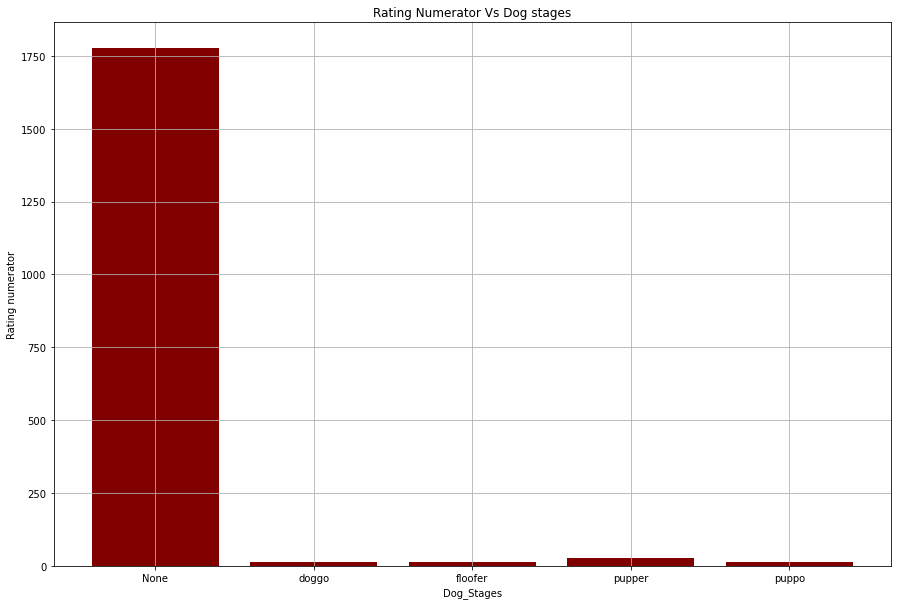

In [125]:
# Using the matplotlib library
x = twitter_archive.Dog_stages.values
y = twitter_archive.rating_numerator.values
plt.figure(figsize=(15,10))
plt.title('Rating Numerator Vs Dog stages')
plt.xlabel('Dog_Stages')
plt.ylabel('Rating numerator')
plt.bar(x,y,color = 'maroon')
plt.grid()

## Checking if there's any relationship between the source and the rating numerators

In [129]:
twitter_archive.groupby('source')['rating_numerator'].value_counts()

source              rating_numerator
Twitter for iPhone  12                  1856
                    10                  1588
                    11                  1560
                    13                  1160
                    9                    508
                    8                    336
                    7                    184
                    14                   144
                    5                    124
                    6                    116
                    3                     64
                    4                     44
                    1                     28
                    2                     28
                    0                      8
                    420                    8
                    15                     4
                    24                     4
                    26                     4
                    27                     4
                    44                     4
                  

## All tweets were from an iphone, so there is no valid relationship between the source and the rating numerators.